In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
def uses(parts):
    remove = ["--use-cls", "--use-index"]
    uses_cls = "--use-cls" in parts
    uses_idx = "--use-index" in parts
    parts = filter(lambda v: v not in remove, parts)
    return uses_cls, uses_idx, parts

def get_sel(ep):
    if ep == 91400.0:
        return 1.0
    elif ep == 71000.0:
        return 10.0
    elif ep == 1.0:
        return 100.0
    assert False
    
def get_sel2(c):
    if c == "ave":
        return 1.0
    elif c == "uriously":
        return 10.0
    elif c[0] == "[":
        return 100.0
    assert False

def process_line(line):
    ignore = ["run-query", "--quiet", "run-1", "run-2"]
    if line[:9] != "run-query":
        return None
    parts = line.split()
    parts = filter(lambda v: v not in ignore, parts)
    # runtime
    runtime = float(parts[-1])
    parts = parts[:-1]
    # use cls
    uses_cls, uses_idx, parts = uses(parts)
    # convert to key/value pairs
    assert len(parts) % 2 == 0
    res = {'runtime': runtime, 'cls': uses_cls, 'idx': uses_idx}
    pit = iter(parts)
    for key in pit:
        assert key[:2] == "--"
        key = key[2:]
        val = next(pit)
        try:
            val = float(val)
        except:
            pass
        res.update({key:val})
    if 'extended-price' in res:
        res.update({'sel': get_sel(res["extended-price"])})
    elif 'comment_regex' in res:
        res.update({'sel': get_sel2(res["comment_regex"])})
    else:
        res.update({'sel': -1.0})
    return res
    
def load_traces(fnpat):
    for fn in glob.glob(fnpat):
        print fn, fnpat
        with open(fn, 'r') as f:
            results = filter(None, map(process_line, f.readlines()))
            return pd.DataFrame(results)

def combine_traces(*fns):
    fnit = iter(fns)
    dfs = []
    for fn in fnit:
        df = load_traces(fn)
        df["nosds"] = next(fnit)
        dfs.append(df)
    return pd.concat(dfs)

In [6]:
df = combine_traces("run4/run.log", 1, "run3/run.log", 2, "run2/run.log", 3, "run2/run-rest.log", 3, "run2/qf-compile.log", 3)
del df["order-key"]
del df["line-number"]
del df["extended-price"]
del df["pool"]
del df["comment_regex"]
del df["num-objs"]
df = df.groupby(['cls', 'idx', 'nosds', 'nthreads', 'query', 'sel']).mean().reset_index()

run4/run.log run4/run.log
run3/run.log run3/run.log
run2/run.log run2/run.log
run2/run-rest.log run2/run-rest.log
run2/qf-compile.log run2/qf-compile.log


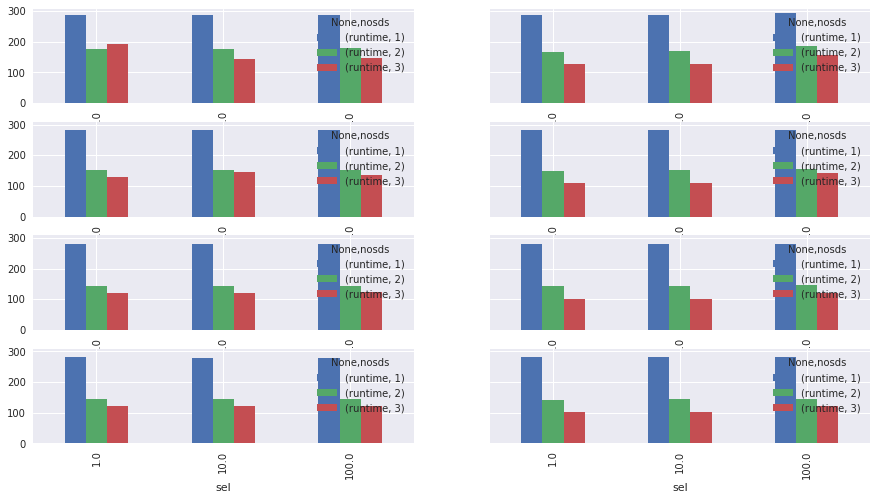

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharey=True, figsize=(15,8))


df2 = df[(df["query"] == "b") & (df["cls"] == False) & (df["nthreads"] == 10.0)].set_index(['nosds', 'sel'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["nthreads"]
df2.unstack(0).plot.bar(ax=ax[0,0])

df2 = df[(df["query"] == "b") & (df["cls"] == True) & (df["nthreads"] == 10.0)].set_index(['nosds', 'sel'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["nthreads"]
df2.unstack(0).plot.bar(ax=ax[0,1])

df2 = df[(df["query"] == "b") & (df["cls"] == False) & (df["nthreads"] == 20.0)].set_index(['nosds', 'sel'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["nthreads"]
df2.unstack(0).plot.bar(ax=ax[1,0])

df2 = df[(df["query"] == "b") & (df["cls"] == True) & (df["nthreads"] == 20.0)].set_index(['nosds', 'sel'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["nthreads"]
df2.unstack(0).plot.bar(ax=ax[1,1])

df2 = df[(df["query"] == "b") & (df["cls"] == False) & (df["nthreads"] == 40.0)].set_index(['nosds', 'sel'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["nthreads"]
df2.unstack(0).plot.bar(ax=ax[2,0])

df2 = df[(df["query"] == "b") & (df["cls"] == True) & (df["nthreads"] == 40.0)].set_index(['nosds', 'sel'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["nthreads"]
df2.unstack(0).plot.bar(ax=ax[2,1])

df2 = df[(df["query"] == "b") & (df["cls"] == False) & (df["nthreads"] == 60.0)].set_index(['nosds', 'sel'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["nthreads"]
df2.unstack(0).plot.bar(ax=ax[3,0])

df2 = df[(df["query"] == "b") & (df["cls"] == True) & (df["nthreads"] == 60.0)].set_index(['nosds', 'sel'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["nthreads"]
df2.unstack(0).plot.bar(ax=ax[3,1])

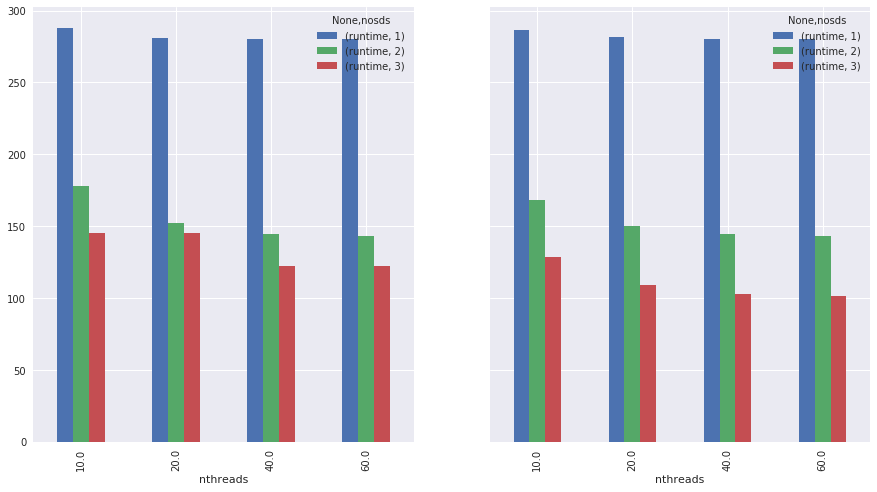

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,8))

df2 = df[(df["query"] == "b") & (df["cls"] == False) & (df["sel"] == 10.0)].set_index(['nosds', 'nthreads'])
del df2['cls']bb
del df2['idx']
del df2['query']
del df2["sel"]
df2.unstack(0).plot.bar(ax=ax[0])

df2 = df[(df["query"] == "b") & (df["cls"] == True) & (df["sel"] == 10.0)].set_index(['nosds', 'nthreads'])
del df2['cls']
del df2['idx']
del df2['query']
del df2["sel"]
df2.unstack(0).plot.bar(ax=ax[1])

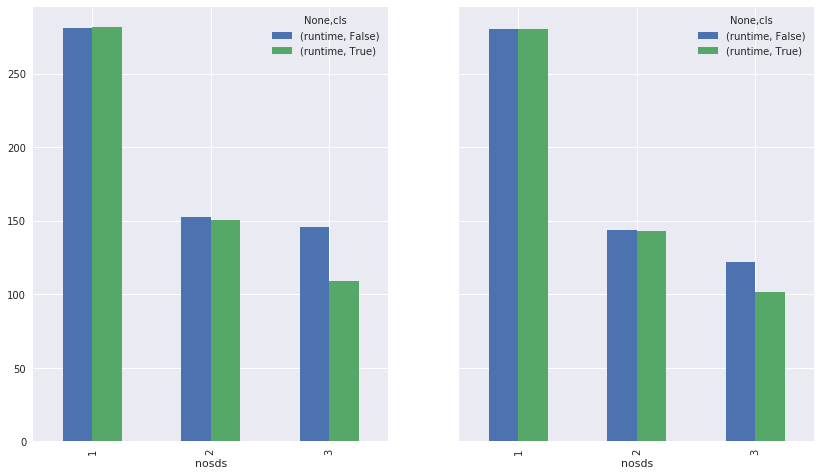

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14,8))

df2 = df[(df["query"] == "b") & (df["sel"] == 10.0) & (df["nthreads"] == 20.0)].set_index(['nosds', 'cls'])
del df2['idx']
del df2['query']
del df2["sel"]
del df2["nthreads"]
df2.unstack(1).plot.bar(ax=ax[0])

df2 = df[(df["query"] == "b") & (df["sel"] == 10.0) & (df["nthreads"] == 60.0)].set_index(['nosds', 'cls'])
del df2['idx']
del df2['query']
del df2["sel"]
del df2["nthreads"]
df2.unstack(1).plot.bar(ax=ax[1])

# why not seeing more benefit from more threads on 3osd/cls
# B0

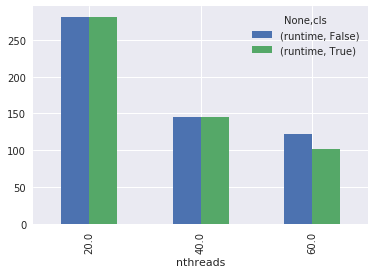

In [55]:
dfs = []
for nosds, nthreads in ((1, 20), (2, 40), (3, 60)):
    df2 = df[(df["query"] == "b") & (df["sel"] == 10.0) & (df["nthreads"] == nthreads) & (df["nosds"] == nosds)]
    dfs.append(df2)
df2 = pd.concat(dfs)
del df2["idx"]
del df2["sel"]
del df2["query"]
del df2["nosds"]
df2.set_index(["nthreads", "cls"]).unstack(1).plot.bar()

# why the hell would you use cls? well it doesn't hurt. also, it seems to start to help. need
# to run with larger experiment.

# B1

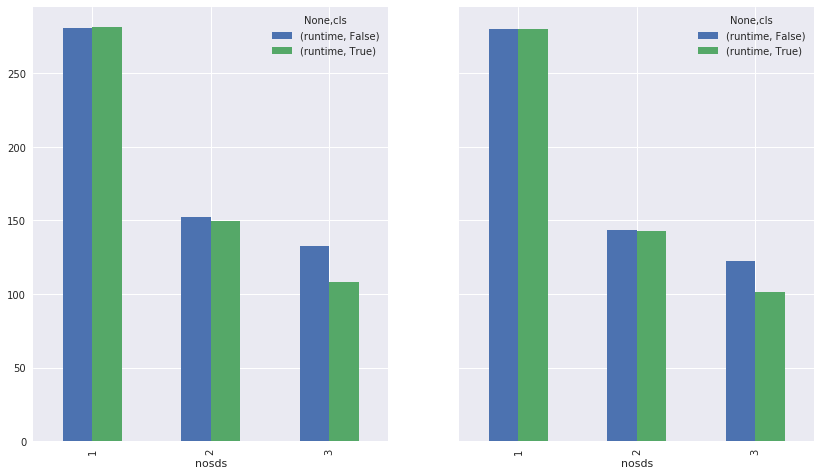

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14,8))

df2 = df[(df["query"] == "a") & (df["sel"] == 10.0) & (df["nthreads"] == 20.0)].set_index(['nosds', 'cls'])
del df2['idx']
del df2['query']
del df2["sel"]
del df2["nthreads"]
df2.unstack(1).plot.bar(ax=ax[0])

df2 = df[(df["query"] == "a") & (df["sel"] == 10.0) & (df["nthreads"] == 60.0)].set_index(['nosds', 'cls'])
del df2['idx']
del df2['query']
del df2["sel"]
del df2["nthreads"]
df2.unstack(1).plot.bar(ax=ax[1])

# A0

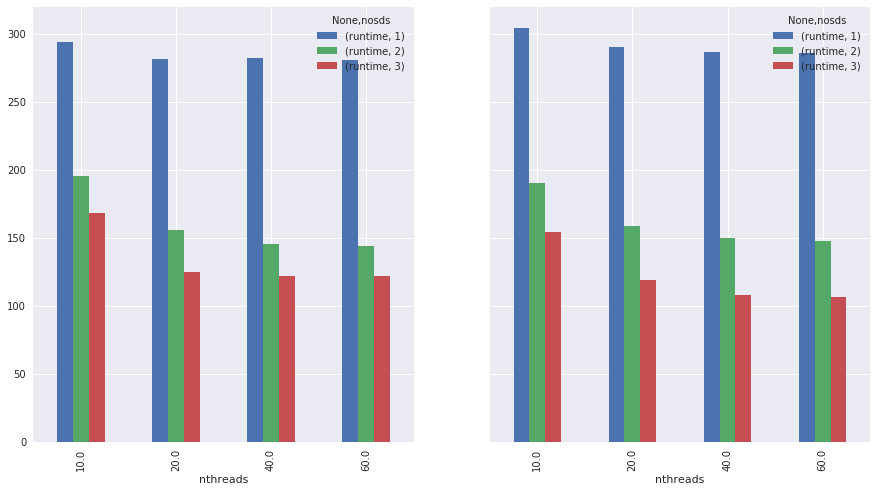

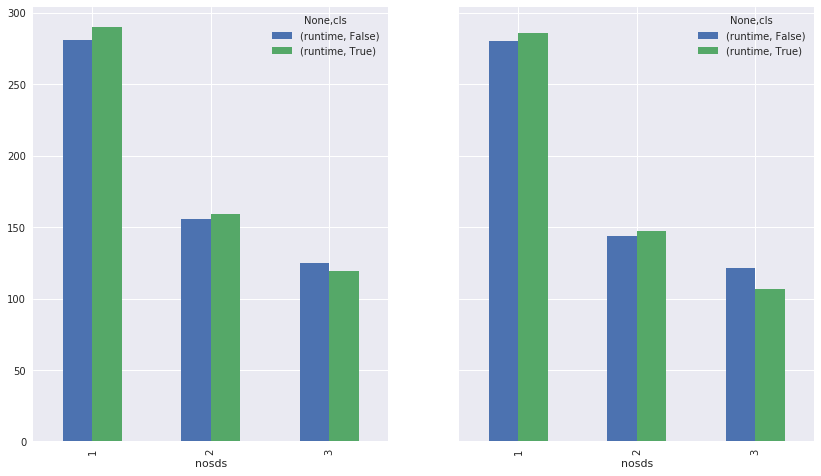

In [59]:
def graph_a(df, query):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,8))

    df2 = df[(df["query"] == query) & (df["cls"] == False) & (df["sel"] == 10.0)].set_index(['nosds', 'nthreads'])
    del df2['cls']
    del df2['idx']
    del df2['query']
    del df2["sel"]
    df2.unstack(0).plot.bar(ax=ax[0])

    df2 = df[(df["query"] == query) & (df["cls"] == True) & (df["sel"] == 10.0)].set_index(['nosds', 'nthreads'])
    del df2['cls']
    del df2['idx']
    del df2['query']
    del df2["sel"]
    df2.unstack(0).plot.bar(ax=ax[1])
    
def graph_b(df, query):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14,8))

    df2 = df[(df["query"] == query) & (df["sel"] == 10.0) & (df["nthreads"] == 20.0)].set_index(['nosds', 'cls'])
    del df2['idx']
    del df2['query']
    del df2["sel"]
    del df2["nthreads"]
    df2.unstack(1).plot.bar(ax=ax[0])

    df2 = df[(df["query"] == query) & (df["sel"] == 10.0) & (df["nthreads"] == 60.0)].set_index(['nosds', 'cls'])
    del df2['idx']
    del df2['query']
    del df2["sel"]
    del df2["nthreads"]
    df2.unstack(1).plot.bar(ax=ax[1])
    
graph_a(df, "f")
graph_b(df, "f")

# F0

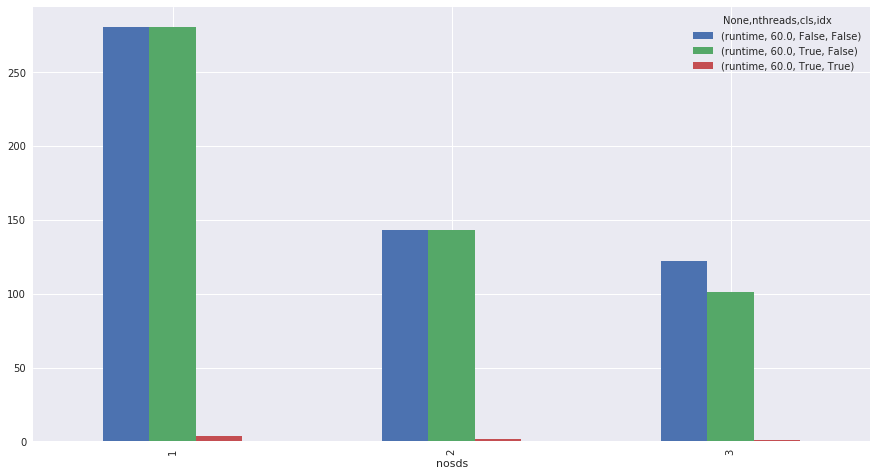

In [75]:
def graph_d(df, query):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(15,8))
    df2 = df[(df["query"] == query) & (df["nthreads"] == 60.0)].set_index(['nosds', 'nthreads', "cls", "idx"])
    #del df2['cls']
    #del df2['idx']
    del df2['query']
    del df2["sel"]
    df2.unstack([1,2,3]).plot.bar(ax=ax)

    #df2 = df[(df["query"] == query) & (df["cls"] == True) & (df["sel"] == 10.0)].set_index(['nosds', 'nthreads'])
    #del df2['cls']
    #del df2['idx']
    #del df2['query']
    #del df2["sel"]
    #df2.unstack(0).plot.bar(ax=ax[1])
    
graph_d(df, "d")